# 3D segmentation example

In [167]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
# %matplotlib notebook
import sys
# sys.path.append('/Users/jakob/Documents/RU/Code/segment')
import watershed3d
# from imutils import random_cmap
from skimage.morphology import watershed
import matplotlib as mpl
from skimage.measure import regionprops
import pandas as pd
import tifffile as tiff
from matplotlib.pylab import imshow, plot, subplots, hist, scatter, bar, step, axis, figure
import h5py
# import imutils

/Users/jakob/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


load file 

In [2]:
filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c1.tif'
# filename = '/Users/jakob/Documents/RU/Code/watershed3d/segmentation_example/DAPI-1.tif'
# filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0127/UFO20150807_stitched001_T0127_c1.tif'
# filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0050/UFO20150807_stitched001_T0050_c1.tif'
# filename = '/Users/jakob/Documents/RU/Data/mouse_example/C1-Brachy_568_FoxA2_488_Cdx2_647_500um_2_filtered.tif'
w = watershed3d.Ws3d(filename)

check histogram of image data

load Ilastik probability mask and plot it

In [3]:
w.load_mask(prob=0.5)
# w.plot_probability_map(21)

do segmentation without the object classifier

In [4]:
# w.segment(cyto_size=2,sigma=(3,3,3), min_distance=2, compactness=0.5, opensize_small_objects=10, remove_small_nuclei=1)
w.segment(cyto_size=None,sigma=(3,3,3), min_distance=2, compactness=0.1, opensize_small_objects=10, remove_small_nuclei=1)

show segmentation

In [5]:
# for cyto 
cmap, cmapd = watershed3d.random_cmap(seed=123, return_darker=1)
z=25
imshow(np.ma.masked_equal(w.labels_cyto[z],0), cmap=cmapd)
imshow(np.ma.masked_equal(w.ws[z],0), cmap=cmap)

# figure()
# imshow(np.ma.masked_equal(w.labels_cyto[20], 1), cmap=cmap)
# figure()
# imshow(w.labels_cyto[20], cmap=watershed3d.random_cmap(seed=123))
# imshow(np.ma.masked_where(w.labels_cyto[20]==0,w.labels_cyto[20]), cmap=watershed3d.random_cmap(seed=123))


TypeError: 'NoneType' object is not subscriptable

In [6]:
watershed3d.browse_stack(w, plot_number=False)

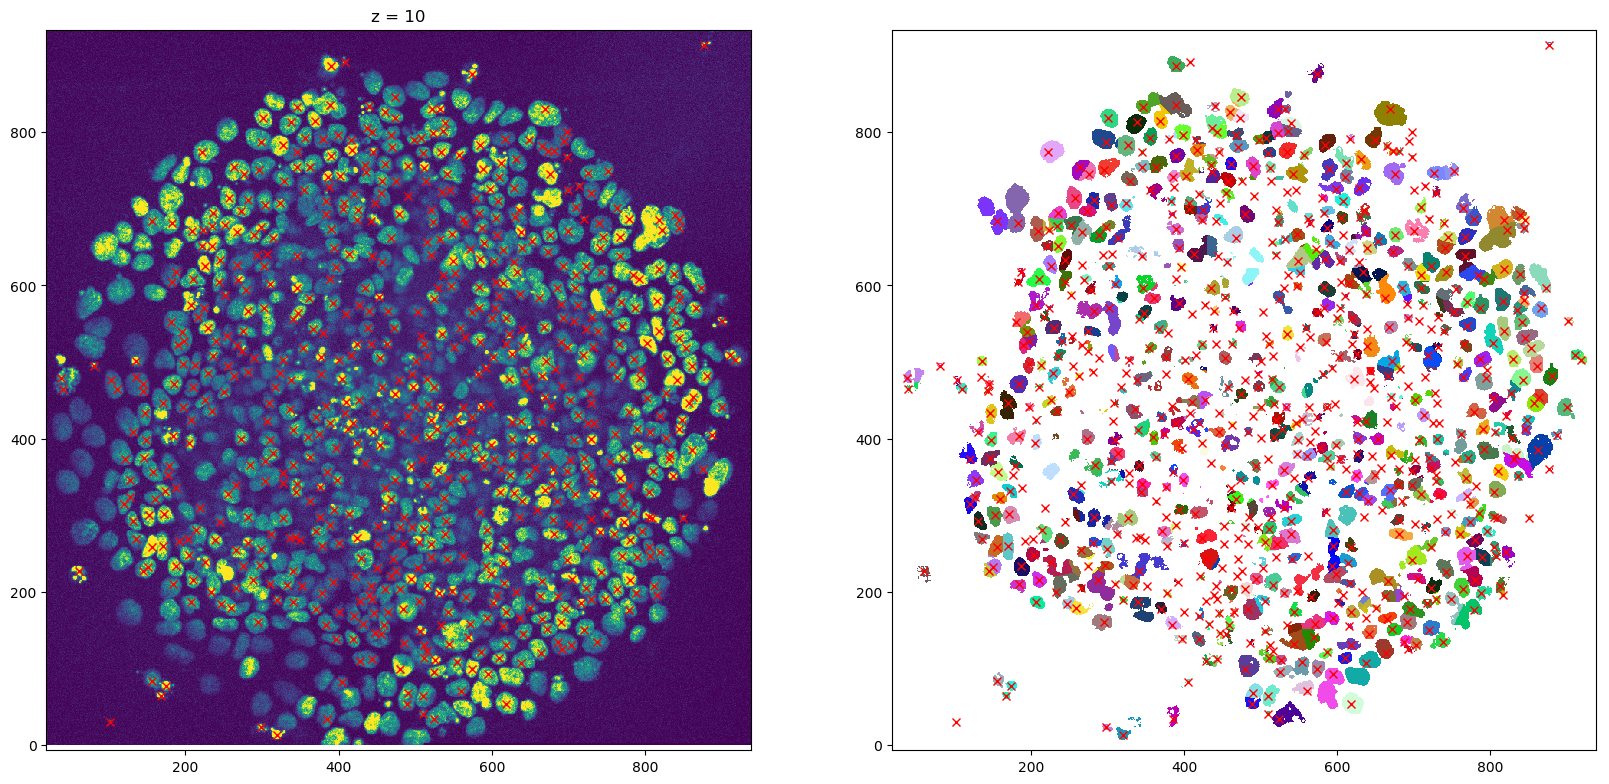

In [7]:
w.show_segmentation(z=10,figsize=(20,10), plot_cyto=0)

In [17]:
# np.array(w.df.total_intensity/w.df.total_intensity_cyto)

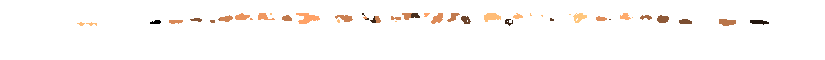

In [18]:
reload(watershed3d)
watershed3d.zview(w, cell_based=True)

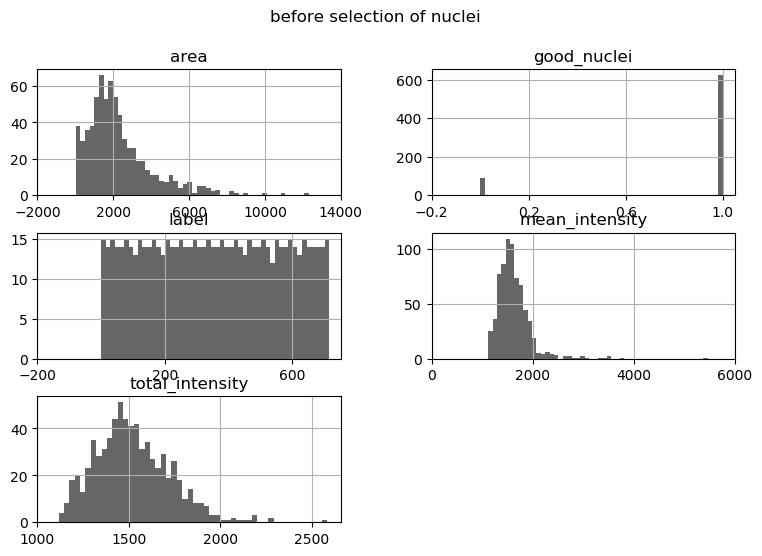

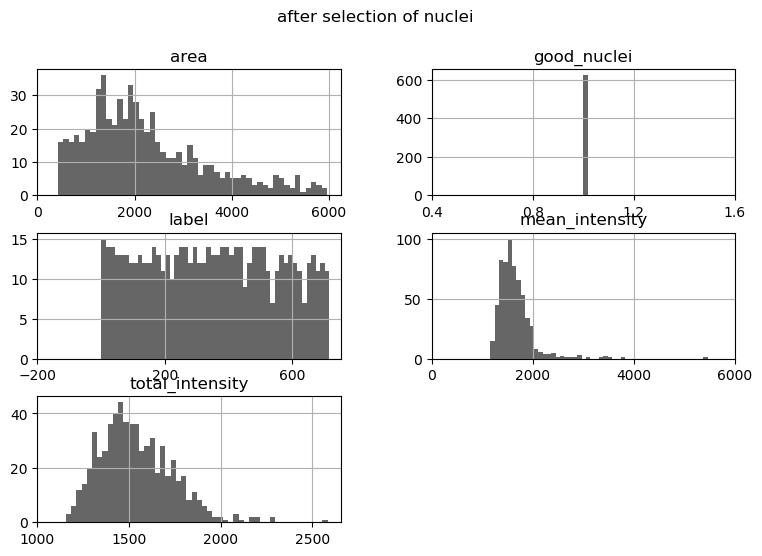

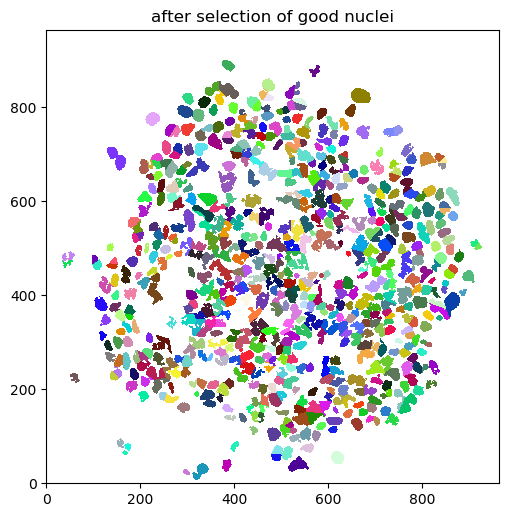

In [8]:
w.select_nuclei(quantiles=[0.1,0.9], cutoff=[400,6000], plot=1)

apply to other channels

In [9]:
filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c3.tif'
filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c2.tif'
filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/UFO20150807_stitched001_T0162_c4.tif'

In [10]:
w.apply_to_channels(filename_sox2, 'sox2')
w.apply_to_channels(filename_bra, 'bra')
w.apply_to_channels(filename_sox17, 'sox17')

In [12]:
# reload(watershed3d)
# watershed3d.dump_mask_and_images(w, 'mytestfile2.hd5', compression=4, write_every_nth_z=3)

In [13]:
# with h5py.File("mytestfile2.hd5", "r") as f:
#     for key in f:
#         print(key)
#     bratest = f['bra'][:]
#     soxtest = f['sox2'][:]    
#     dapistest=f['dapi'][:]
#     testmask = f['mask'][:]


In [14]:
# imshow(dapistest[5]), dapistest.shape

In [15]:
w.df.head()
# w.good_nuclei.head()

,area,total_intensity,mean_intensity,centroid,centroid_rescaled,label,good_nuclei,sox2,sox2_norm,bra,bra_norm,sox17,sox17_norm
cell_id,,,,,,,,,,,,,
1,2067,1526.0,1965.140784,"[3.7431059506531206, 302.785679729076, 723.388...","[3.7431059506531206, 302.785679729076, 723.388...",1,True,306.0,0.155714,220.0,0.111951,132.0,0.067171
2,1273,1457.0,1492.894737,"[3.760408483896308, 361.47996857816185, 657.69...","[3.760408483896308, 361.47996857816185, 657.69...",2,True,523.0,0.350326,197.0,0.131958,132.0,0.088419
3,5355,1511.0,1569.716527,"[4.284593837535014, 383.36283846872084, 674.20...","[4.284593837535014, 383.36283846872084, 674.20...",3,True,416.0,0.265016,205.0,0.130597,131.0,0.083455
4,2676,1560.5,1722.541854,"[4.4024663677130045, 421.47720478325857, 623.1...","[4.4024663677130045, 421.47720478325857, 623.1...",4,True,600.5,0.348613,181.0,0.105077,127.0,0.073728
5,1372,1348.5,1456.328717,"[4.295189504373178, 442.8061224489796, 674.501...","[4.295189504373178, 442.8061224489796, 674.501...",5,True,377.0,0.258870,201.5,0.138362,127.0,0.087206


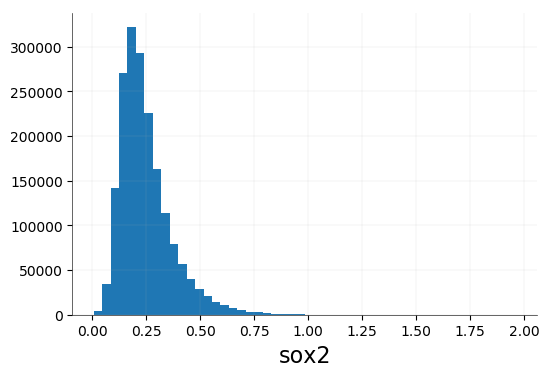

In [16]:
reload(watershed3d)
watershed3d.histogram_pixel([w],'sox2', normalize=1)

In [31]:
# fig,ax=subplots()
# ax.hist(w.df['sox2'],bins=50);

In [18]:
# w.df['sox2'].hist(bins=50)

In [27]:
np.isnan(np.vstack(w.df.centroid)).any()

False

In [448]:
index = w._get_indices(True)
indices = (1, 2)
x = np.vstack(w.df.centroid[index].values.flat)[:, indices[0]] - w.center[indices[0]]
y = np.vstack(w.df.centroid[index].values.flat)[:, indices[1]] - w.center[indices[1]]
c = w.df['sox2'][index].values
c /= c.max()

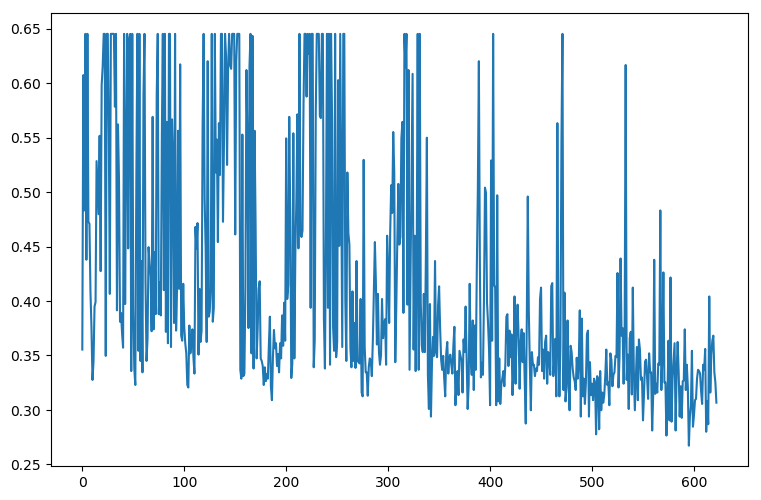

In [222]:
c_clip = np.clip(c, c.min(), np.percentile(c, 90))
plot(c_clip)

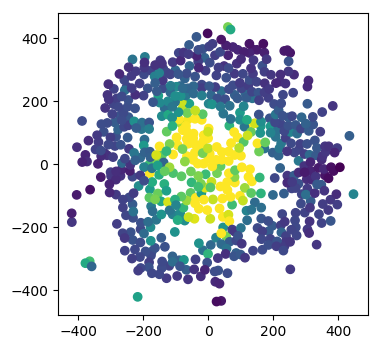

In [223]:
fig,ax=subplots(figsize=(4,4))
ax.scatter(x,y,c=c_clip)

In [234]:
H[0,:100]

array([0.        , 0.        , 0.        , 0.        , 0.42950058,
       0.        , 0.42950058, 0.        , 0.        , 0.        ,
       0.        , 0.42950058, 0.42950058, 0.        , 0.42950058,
       0.        , 0.42950058, 0.42950058, 0.        , 0.        ,
       0.        , 0.42950058, 0.42950058, 0.        , 0.42950058,
       0.        , 0.        , 0.        , 0.42950058, 0.85900116])

In [238]:
H[0,:100]

array([0.        , 0.        , 0.        , 0.        , 0.00021006,
       0.        , 0.00019259, 0.        , 0.        , 0.        ,
       0.        , 0.00020708, 0.00025565, 0.        , 0.00020324,
       0.        , 0.00031786, 0.00023733, 0.        , 0.        ,
       0.        , 0.00034002, 0.00030465, 0.        , 0.00020836,
       0.        , 0.        , 0.        , 0.00028335, 0.00052366])

0.21666156231653755

In [321]:
np.tile(d_r*np.arange(1,nr)**2-d_r*np.arange(0,nr-1)**2, (H.shape[1],1)).T.shape

(9, 29)

In [316]:
(d_r*np.arange(1,nr)**2-d_r*np.arange(0,nr-1)**2).shape, H.shape, Theta.shape, R.shape

((9,), (9, 29), (10, 30), (10, 30))

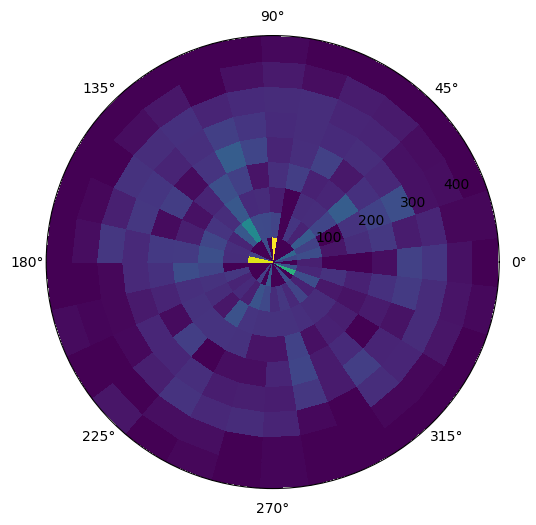

In [336]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

# N = 1000
# r = .5 + np.random.normal(size=N, scale=.1)
# theta = np.pi / 2 + np.random.normal(size=N, scale=.1)
r, theta = cart2pol(x,y)
# Histogramming
nr = 10
ntheta = 30
r_edges = np.linspace(0, r.max(), nr + 0)
theta_edges = np.linspace(-np.pi, np.pi, ntheta + 0)
c_clip = np.clip(c, c.min(), np.percentile(c, 70))

# do the area normalization in the weights!!!
# what is the area of one bin?
# are of pie (circular sector) is pi*r**2 *d_th / (2pi)
# so are of bin is 
d_th = np.diff(theta_edges)[0]
d_r = np.diff(r_edges)[0]

H, _, _ = np.histogram2d(r, theta, [r_edges, theta_edges], weights=c_clip/r, normed=False)

# Plot
ax = plt.subplot(111, polar=True)
Theta, R = np.meshgrid(theta_edges, r_edges)
ax.pcolormesh(Theta, R, H)
# ax.pcolormesh(Theta, R, H/np.tile(d_r*np.arange(2,nr+1)**2-d_r*np.arange(1,nr)**2, (H.shape[1],1)).T)
plt.show()

In [368]:
reload(watershed3d)

<module 'watershed3d' from '/Users/jakob/Documents/RU/Code/watershed3d/watershed3d.py'>

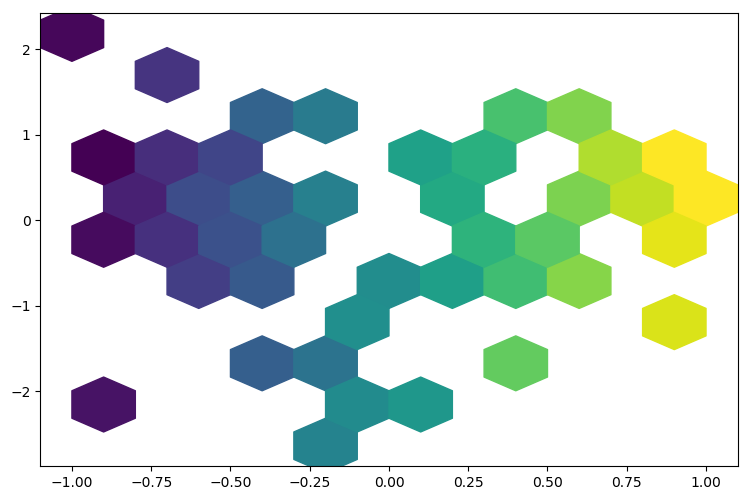

In [439]:
from numpy import linspace
from numpy.random import normal
from pylab import hexbin,show

n = 2**6

x = linspace(-1,1,n)
y = normal(0,1,n)

h = hexbin(x,y,C=x, gridsize=10, mincnt=0)


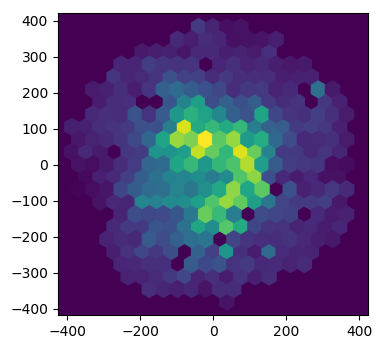

In [467]:
watershed3d.radial_histogram_plot([w], 'sox2', bins=20, r_limit=390, filename='pics/radial_hist_test.pdf')

In [446]:
def fff(a):
#     a = [b+1 for b in a]
    return np.mean(a)+1

In [465]:
import matplotlib

cmap = matplotlib.cm.get_cmap('viridis')
cmap(0.)

(0.267004, 0.004874, 0.329415, 1.0)

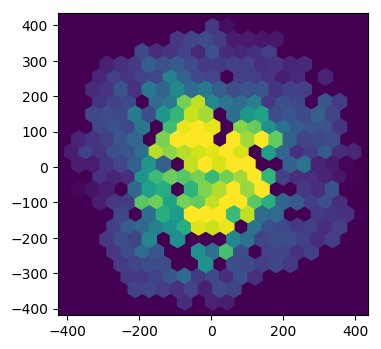

In [466]:
fig,ax=subplots(figsize=(4,4))
rlim = 400
trim = (x**2+y**2)<rlim**2
c_clip = np.clip(c, c.min(), np.percentile(c, 90))
c_clip -= c_clip.min()
c_clip /= c_clip.max()

hb = ax.hexbin(x[trim], y[trim], C=c_clip[trim], reduce_C_function=np.mean, gridsize=20, mincnt=0, cmap='viridis')
ax.set_facecolor(cmap(0.))


/Users/jakob/anaconda3/lib/python3.5/site-packages/physt/histogram_base.py:87: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(frequencies.dtype, np.float):


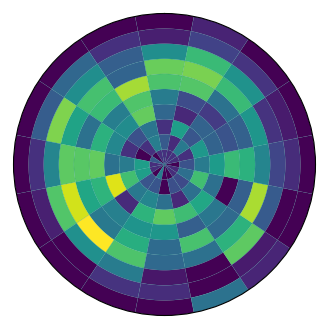

In [291]:
from physt import special
import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='polar')
# fig, ax = plt.subplots(figsize=(1,1))

# data = np.array([[.5, 3.05], [.5, 3.2], [.7, 3.3]])
# weights = np.array([4, 5, 10])
c_clip = np.clip(c, c.min(), np.percentile(c, 90))
# hist = special.polar_histogram(x, y)
# hist = special.polar_histogram(x,y, "human", 30, weights=c_clip)#, radial_bins="human", phi_bins="human")
hist = special.polar_histogram(x,y,'human', weights=c_clip,transformed=False)#, radial_bins="human", phi_bins="human")
# hist.fill_n(data, weights=weights, transformed=True)

ax = hist.plot.polar_map(density=0, figsize=(4,4), lw=0.1, show_zero=True, cmap="viridis")
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.grid('off')
ax.set_theta_zero_location('N')
# plt.savefig('pics/test_radial_hist.pdf')


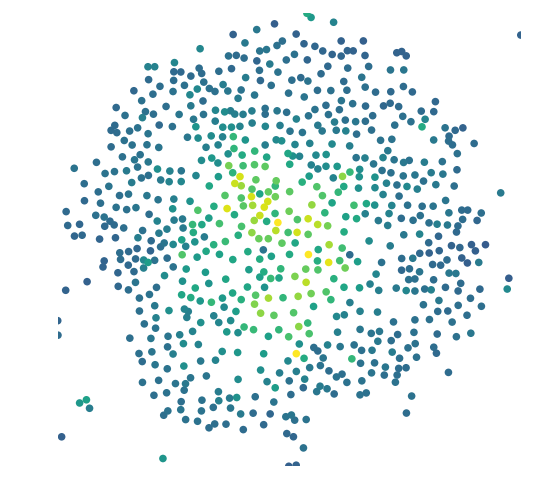

In [183]:
watershed3d.dot_plot([w], 'sox2', color_range=[0,800], r_limit=None)

sox2 < 100 and sox17 < 100 = 0.00%
sox2 > 100 and sox17 < 100 = 0.60%
sox2 < 100 and sox17 > 100 = 0.00%
sox2 > 100 and sox17 > 100 = 99.40%


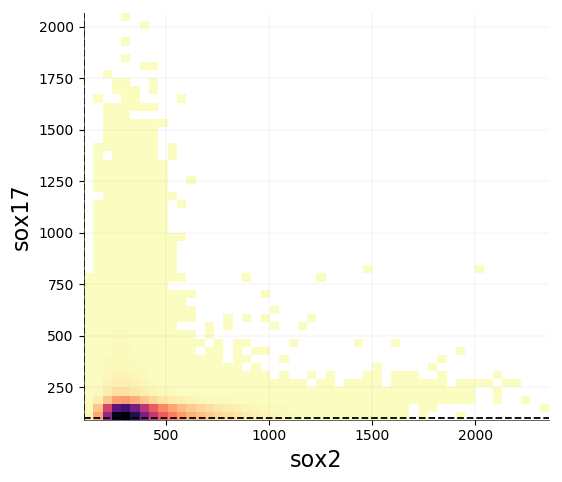

In [43]:
reload(watershed3d)
watershed3d.coexpression_per_pixel(w, 'sox2', 'sox17', gates=[100,100], bins=50, lognorm=False)

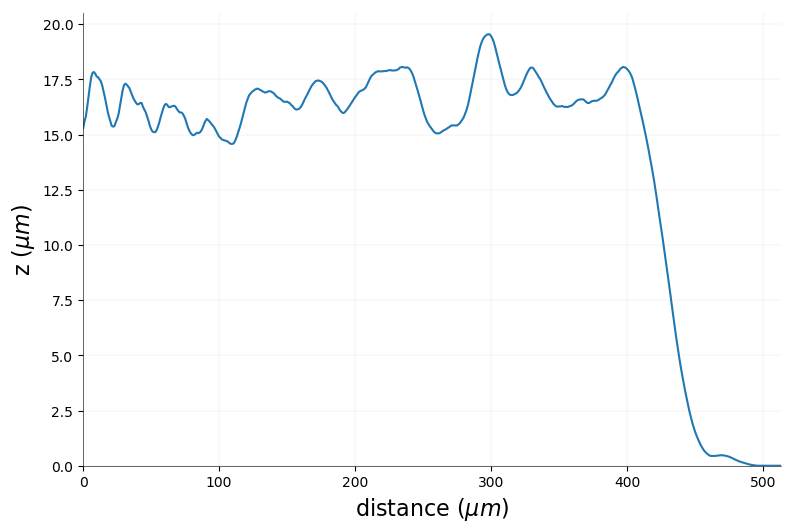

In [39]:
reload(watershed3d)
watershed3d.radial_z_height(w, z_scale=3.);

/Users/jakob/Documents/RU/Code/watershed3d/watershed3d.py:1209: RuntimeWarning: invalid value encountered in true_divide
  radialprofile = tbin / nr


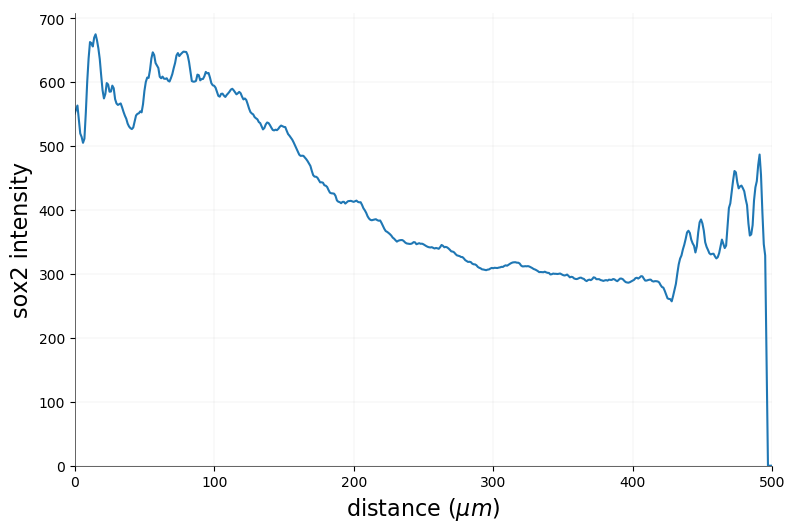

In [40]:
%matplotlib inline
reload(watershed3d)
r,rs = watershed3d.radial_intensity(w, 'sox2', only_selected_nuclei=1, plot=True, binsize=2, xcutoff=500)
# fig,ax=subplots()
# ax.plot(r,pd.DataFrame(rs).rolling(5).mean())
# ax.set_xlim([0,450])
# ax.set_xlabel('r', fontsize=16)
# ax.set_ylabel('Sox2 intensity', fontsize=16)
# watershed3d.nice_spines(ax)

In [41]:
watershed3d.coexpression_per_cell(w, 'bra', 'sox17', only_selected_cells=1)

ValueError: cannot index with vector containing NA / NaN values

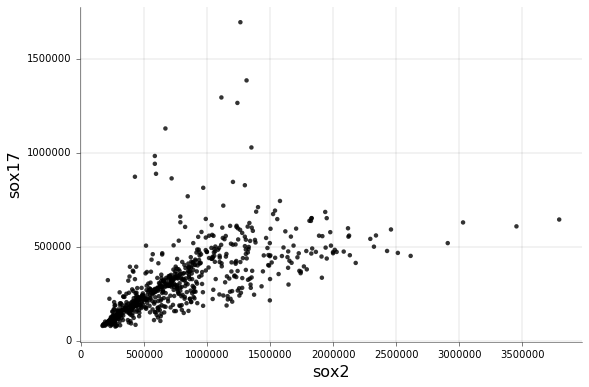

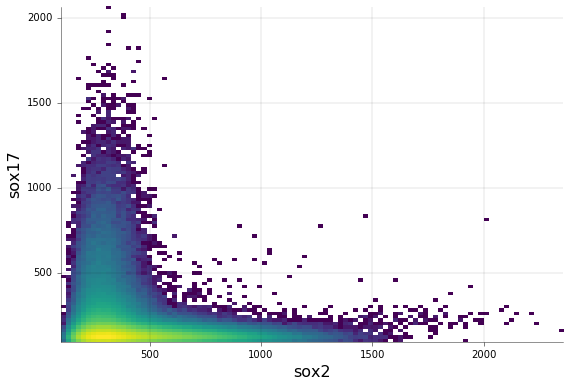

In [57]:
watershed3d.coexpression_per_cell(w, 'sox2', 'sox17', only_selected_cells=1)
watershed3d.coexpression_per_pixel(w, 'sox2', 'sox17', only_selected_cells=1, lognorm=1, bins=100)